In [1]:
#Assignment 5: perform tests
#K-S test , KL AD tests on Gaussian and Binomial
#Goal is to play with parameters and observe the changes in the distributions of all ages
#Combines age of women and men bikers for February
#Idea: In the same age interval men ride bikes more than women
#Hypothesis: Men between ages 30 to 35 ride more bikes than women in the same ages
#Null Hypothesis (Ho): The number of men who ride citybikes between ages 30-35 are same or lower in February than women of same ages 
#Alternative Hypthesis (Ha): The number of men who ride citybikes between 30-35 are significanlt higher then women of same age for February month
#alpha = 0.05

#Plot samples with Normal and binomial distributions. epmhasis on center
    #KS: Test if a sample comes from a specific dist
    #Ho: the data follow a specified dist 
    #Ha: the data do not follow the specified dist
    #aplha: if statistic value is greater than test's critical value reject null hypothesis

    #AD: Goodness of fit test to check whether data came from a population with a pecified distribution. Emphasis is on tails
    #Ho: the data follow a specified dist 
    #Ha: the data do not follow the specified dist
    #aplha: if test statistic value is greater than test's critical reject nul hypothesis
    
#Ho - H1 >= 0
#Ho - H1 < 0 

#Sources: http://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
        #http://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
        #http://pandas.pydata.org/pandas-docs/stable/merging.html
        #http://sparky.rice.edu/astr360/kstest.pdf (for KS critical value)
        
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile
import scipy.stats

%pylab inline

datestring = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df['date'] = pd.to_datetime(df['starttime'])
df.head()

Populating the interactive namespace from numpy and matplotlib
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  10.9M      0 --:--:-- --:--:-- --:--:-- 17.5M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [84]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [2]:
df.drop(['start station id', 'start station name', 'start station latitude', 
         'start station longitude', 'end station id', 'end station name','end station latitude', 'end station longitude', 
         'bikeid',], axis=1, inplace=True)

In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [4]:
df.head()

,tripduration,starttime,stoptime,usertype,birth year,gender,date,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,Subscriber,1978.0,2,2015-02-01 00:00:00,NaN,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,Subscriber,1969.0,2,2015-02-01 00:01:00,NaN,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,Subscriber,1985.0,2,2015-02-01 00:01:00,NaN,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,NaN


In [7]:
#Dropping NaN values.....NaN still appear? 
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)
df.head()

,tripduration,starttime,stoptime,usertype,birth year,gender,date,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,Subscriber,1978.0,2,2015-02-01 00:00:00,NaN,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,Subscriber,1969.0,2,2015-02-01 00:01:00,NaN,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,Subscriber,1985.0,2,2015-02-01 00:01:00,NaN,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,NaN


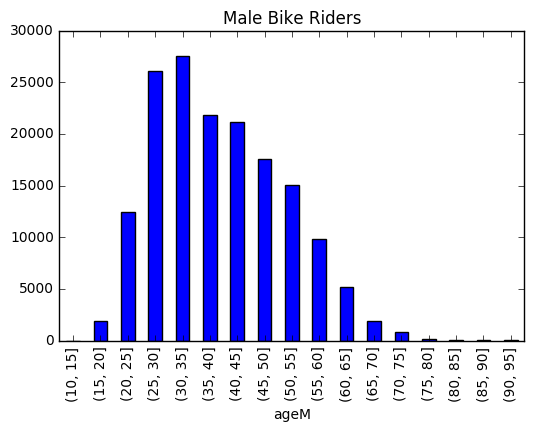

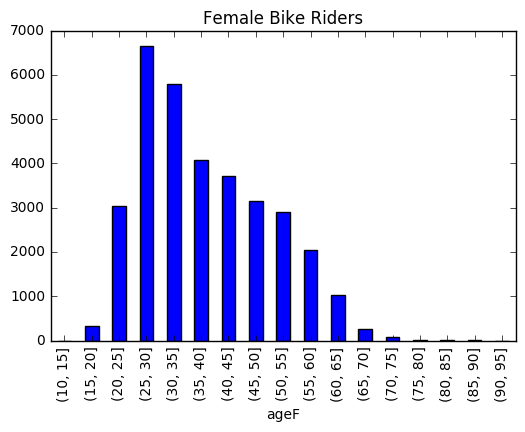

In [5]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("Male Bike Riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axF.set_title("Female Bike Riders")

In [14]:
#combine_age = [ ]
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)

list1 = df['ageM'].value_counts(ascending=False)
#y = list1.reshape(list1.size, 1)
list2 = df['ageF'].value_counts(ascending=True)

print ("normal on normal", scipy.stats.kstest(list1, 'norm'))
print ("normal on normal", scipy.stats.anderson(list1, dist='norm'))   #d=0.936<1.36 H0 is not rejected
print ("") 

print ("normal on normal", scipy.stats.kstest(list2, 'norm'))
print ("normal on normal", scipy.stats.anderson(list2, dist='norm')) 
print ("")

#H0: the data is normally distributed
#Ha: the data is not normally distributed
#aplha 0.05

#For men riders: for KS test table cr=1.36. reject H0 if statistic > Cr.  that is 0.936<1.36. H0 is not rejected.
#For AD test for aplha 0.05 the Cr=0.75. statistic=3.470 and if (3.470)^2>0.75 H0 is rejected.

#For women riders: for KS test table cr=1.36. reject H0 if statistic > Cr.  that is 0.961<1.36. H0 is not rejected.
#For AD test for aplha 0.05 the Cr=0.745. statistic=1.481 and if (1.481)^2>0.745 H0 is rejected. H0 is rejected.

#Next one is KS AD on Poisson

normal on normal KstestResult(statistic=0.93670932751128022, pvalue=0.0)
normal on normal AndersonResult(statistic=3.4706151231678888, critical_values=array([ 0.549,  0.625,  0.75 ,  0.875,  1.041]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

normal on normal KstestResult(statistic=0.96162486805182079, pvalue=0.0)
normal on normal AndersonResult(statistic=1.4810553822735386, critical_values=array([ 0.545,  0.621,  0.745,  0.869,  1.034]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



In [35]:
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)

list1 = df['ageM'].value_counts(ascending=False)
y = list1.reshape(list1.size, 1)
list2 = df['ageF'].value_counts(ascending=True)

dist_M = np.random.poisson(list1)
print ("poisson on normal", scipy.stats.kstest(dist_M,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_M, dist='norm'))
print ("")

dist_W = np.random.poisson(list2)
print ("poisson on normal", scipy.stats.kstest(dist_W,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_W, dist='norm'))
print ("")

#H0: the data is normally distributed
#Ha: the data is not normally distributed
#aplha 0.05

#For men riders: for KS test table cr=1.36. reject H0 if statistic > Cr.  that is 0.945<1.36. H0 is not rejected.
#For AD test for aplha 0.05 the Cr=0.75. statistic=3.470 and if (3.470)^2>0.75 H0 is rejected.

#For women riders: for KS test table cr=1.36. reject H0 if statistic > Cr.  that is 0.967<1.36. H0 is not rejected.
#For AD test for aplha 0.05 the Cr=0.745. statistic=1.481 and if (1.481)^2>0.745 H0 is rejected. H0 is rejected.

poisson on normal KstestResult(statistic=0.94591427470411282, pvalue=0.0)
poisson on normal AndersonResult(statistic=3.4539923713185914, critical_values=array([ 0.549,  0.625,  0.75 ,  0.875,  1.041]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal KstestResult(statistic=0.9674001019683699, pvalue=0.0)
poisson on normal AndersonResult(statistic=1.4824896245294781, critical_values=array([ 0.545,  0.621,  0.745,  0.869,  1.034]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

